# HeatMap

### Pandas Pivot Table for Time Series Data (Seaborn Input)

Reference: This code block is a data preparation step using Pandas. It prepares data for a time-series heatmap by creating a matrix where rows are time periods (month), columns are larger time periods (year), and cell values are the aggregation (passengers). The observed=False is critical for maintaining all month categories.

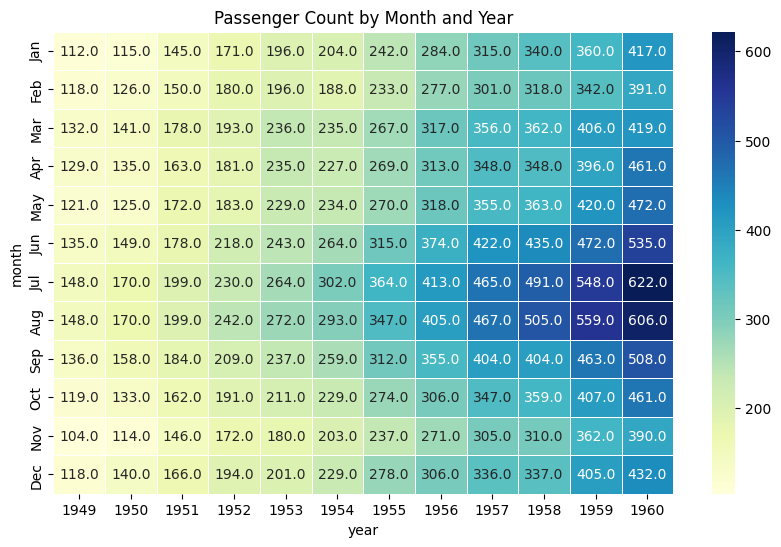

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset
flights = sns.load_dataset('flights')

# Create a pivot table (a matrix) where months are on the Y-axis and years on the X-axis
flight_matrix = flights.pivot_table(index='month', columns='year', values='passengers',
    observed=False )

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    data=flight_matrix,
    annot=True,     # Show the numerical value in each cell
    fmt='.1f',        # Format the numbers as integers
    cmap='YlGnBu',  # Specify the color map (e.g., 'Yellow Green Blue')
    linewidths=.5,  # Adds small lines between cells for separation
    cbar=True       # Display the color bar on the side
)

plt.title('Passenger Count by Month and Year')
plt.show()

### Seaborn Heatmap of Categorical Counts (Integer Annotation)

Reference: This code block is a Seaborn visualization. It displays a pre-calculated matrix (heatmap\_data) as a heatmap, specifically intended for showing counts or frequencies between two categories. The key features are annot=True (show numbers), and fmt='d' (format numbers as integers).

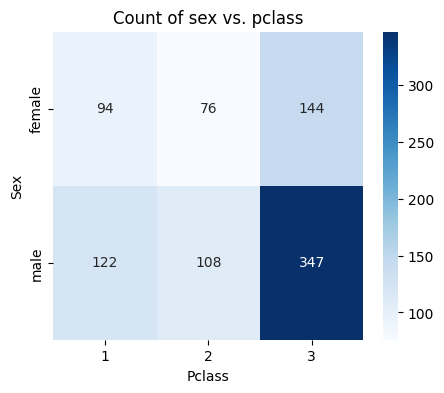

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. SAMPLE DATA (Replace with your actual DataFrame)
# df = pd.read_csv('your_data.csv') 
df = sns.load_dataset('titanic') # Using 'titanic' for example

# Define your columns
COL1 = 'sex'
COL2 = 'pclass'

# --- 2. CREATE THE MATRIX (Pivot Table) ---
# Create a matrix showing the count of observations for each combination of COL1 and COL2.
# We fill any missing combinations (NaNs) with 0.
# The 'observed=False' explicitly handles categorical data for future Pandas versions.
heatmap_data = df.pivot_table(
    index=COL1,         # Goes on the Y-axis of the heatmap
    columns=COL2,       # Goes on the X-axis of the heatmap
    aggfunc='size',     # Use 'size' to count the occurrences in each cell
    fill_value=0,       # Fill NaN values (unobserved combinations) with 0
    observed=False      # Silences the FutureWarning and maintains behavior
)

# --- 3. CREATE THE HEATMAP (Seaborn) ---
plt.figure(figsize=(5, 4))
sns.heatmap(
    data=heatmap_data,
    annot=True,     # Show the numerical count in each cell
    fmt='d',        # Format numbers as integers
    cmap='Blues',   # Use a blue color palette
    cbar=True       # Show the color bar
)

# --- 4. FINALIZE AND DISPLAY ---
plt.title(f'Count of {COL1} vs. {COL2}')
plt.ylabel(COL1.capitalize())
plt.xlabel(COL2.capitalize())
plt.show()

### Seaborn Heatmap of Categorical Means (Floating-Point Annotation)

Reference: This code block is a Seaborn visualization. It is designed to display a matrix where the cell values are calculated averages (means), which are floats. The key difference from the count heatmap is fmt='.2f' (to correctly format floats) and the use of cbar_kws to customize the color bar label, which is important when plotting aggregated statistics like means.

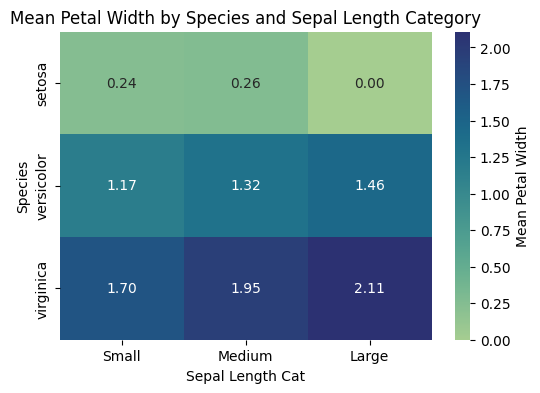

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the data
df = sns.load_dataset('iris')

# --- 2. Create a third categorical column for complexity (3x3 minimum) ---
# Categorize 'sepal_length' into three bins: Small, Medium, Large
bins = [4.0, 5.5, 6.5, df['sepal_length'].max() + 1] # Define the cut points
labels = ['Small', 'Medium', 'Large']
df['sepal_length_cat'] = pd.cut(df['sepal_length'], bins=bins, labels=labels, right=False)

# Define the variables
ROW_CAT = 'species'            # 3 Categories (e.g., 'setosa', 'versicolor')
COL_CAT = 'sepal_length_cat'   # 3 Categories (Small, Medium, Large)
VALUE_VAR = 'petal_width'      # Numeric variable to aggregate (calculate the mean of)

# --- 3. CREATE THE MATRIX (Pivot Table) ---
# Create a matrix showing the MEAN of 'petal_width' for combinations of the two categories.
heatmap_data = df.pivot_table(
    index=ROW_CAT,
    columns=COL_CAT,
    values=VALUE_VAR,
    aggfunc='mean',        # Calculate the mean petal_width
    fill_value=0,         # Fill NaN values (unobserved combinations) with 0
    observed=False
)

# --- 4. CREATE THE HEATMAP (Seaborn) ---
plt.figure(figsize=(6, 4))
sns.heatmap(
    data=heatmap_data,
    annot=True,     # Show the numerical mean value in each cell
    fmt='.2f',      # Format the mean values to 2 decimal places
    cmap='crest',   # Use the 'crest' color palette
    cbar_kws={'label': f'Mean {VALUE_VAR.replace("_", " ").title()}'} # Label the color bar
)

# --- 5. FINALIZE AND DISPLAY ---
plt.title(f'Mean Petal Width by Species and Sepal Length Category')
plt.ylabel(ROW_CAT.capitalize())
plt.xlabel(COL_CAT.replace("_", " ").title())
plt.show()